In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np # linear algebra
import cv2

import os
import random
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, 
    Dense, Dropout, 
    Flatten)
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(os.listdir("/content/gdrive/My Drive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/data"))

['covid', 'non_covid']


In [0]:
IMG_SIZE = 128

In [0]:
CATEGORIES = ['covid', 'non_covid']
dataset = []

def generate_data():
    for category in CATEGORIES:
        path = f'/content/gdrive/My Drive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/data/{category}'
        class_id = CATEGORIES.index(category)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_COLOR)
                image_array = cv2.resize(image_array, (IMG_SIZE , IMG_SIZE))
                dataset.append([image_array, class_id])
            except Exception as e:
                print(e)
    random.shuffle(dataset)
                
generate_data()


In [0]:
print(len(dataset))

162


In [0]:
data = []
labels = []
for features, label in dataset:
    data.append(features)
    labels.append(label)

In [0]:
data = np.array(data)
data.reshape(-1, 128, 128, 3)

In [0]:
pickle.dump(data, open("data1.pickle", "wb"))

pickle.dump(labels, open("labels1.pickle", "wb"))

In [0]:
data = pickle.load(open("data1.pickle", "rb"))

labels = pickle.load(open("labels1.pickle", "rb"))

In [0]:
train_data, data, train_labels, labels = train_test_split(data, 
                                                          labels,
                                                          test_size=0.15)
test_data, validation_data, test_labels, validation_labels = train_test_split(data, 
                                                                    labels,
                                                                   test_size=0.7)
  

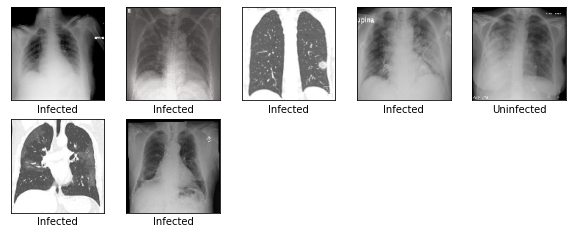

In [0]:
plt.figure(figsize=(10, 10))
i = 0
for i in range(len(test_data)):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i])
    if(test_labels[i] == 0):
        plt.xlabel('Infected')
    else:
        plt.xlabel('Uninfected')
    i += 1
plt.show()

In [0]:
datagen_train = ImageDataGenerator(rescale=1./255,
                            rotation_range=45,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)

datagen_test = ImageDataGenerator(rescale=1./255)
datagen_validation = ImageDataGenerator(rescale=1./255)

In [0]:
datagen_train.fit(train_data)
datagen_test.fit(test_data)
datagen_test.fit(validation_data)

In [0]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(256, activation="relu"),
    Dense(2, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 256)      

In [0]:
BATCH_SIZE = 32
epochs = 30
history=model.fit(train_data, y=np.array(train_labels), batch_size=BATCH_SIZE,epochs=epochs,verbose=1,validation_data=(test_data, np.array(test_labels)))


Epoch 1/30
5/5 [==============================] - 0s 66ms/step - loss: 113.9182 - accuracy: 0.5474 - val_loss: 1.0089 - val_accuracy: 0.8571
Epoch 2/30
5/5 [==============================] - 0s 20ms/step - loss: 1.3058 - accuracy: 0.6934 - val_loss: 1.4806 - val_accuracy: 0.8571
Epoch 3/30
5/5 [==============================] - 0s 19ms/step - loss: 1.4755 - accuracy: 0.8029 - val_loss: 0.5087 - val_accuracy: 0.8571
Epoch 4/30
5/5 [==============================] - 0s 20ms/step - loss: 0.7352 - accuracy: 0.8540 - val_loss: 0.6759 - val_accuracy: 0.8571
Epoch 5/30
5/5 [==============================] - 0s 19ms/step - loss: 0.6544 - accuracy: 0.8540 - val_loss: 0.4369 - val_accuracy: 0.8571
Epoch 6/30
5/5 [==============================] - 0s 18ms/step - loss: 0.4447 - accuracy: 0.8540 - val_loss: 0.3431 - val_accuracy: 0.8571
Epoch 7/30
5/5 [==============================] - 0s 19ms/step - loss: 0.4276 - accuracy: 0.8540 - val_loss: 0.4193 - val_accuracy: 0.8571
Epoch 8/30
5/5 [=========

In [0]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

print(f'Training Accuracy: {np.max(accuracy)}')
print(f'Training Loss: {np.min(loss)}')
print(f'Validation Accuracy: {np.max(val_accuracy)}')
print(f'Validation Loss: {np.min(val_loss)}')

Training Accuracy: 0.9781022071838379
Training Loss: 0.07872577011585236
Validation Accuracy: 1.0
Validation Loss: 0.12494900077581406


In [0]:
epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.xlabel('epochs')
plt.ylabel('Accuracy rate')
plt.plot(epochs_range, accuracy, label="Training Accuracy")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy")
plt.legend(loc="upper left")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.xlabel('epochs')
plt.ylabel('loss rate')
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper left")
plt.title("Training and Validation Loss")
plt.show()

In [0]:
class_names = ['non_covid', 'covid']
def plot_images(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i],images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img)
    
    predicted_label = np.argmax(predictions_array)
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]))

In [0]:
random.shuffle(test_data)
predictions = model.predict(test_data)

In [0]:
num_rows = 8
num_cols = 6
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(len(test_data)):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_images(i, predictions, test_labels, test_data)

In [0]:
model.summary( )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 256)      

In [0]:
loss , accuracy = model.evaluate( test_data , np.array(test_labels) )
print( "Loss of {}".format( loss ) , "Accuracy of {} %".format( accuracy * 100 ) )

1/1 [==============================] - 0s 1ms/step - loss: 1.3742 - accuracy: 0.8571
Loss of 1.3741885423660278 Accuracy of 85.71428656578064 %


In [0]:
pred=model.predict( test_data).argmax( axis=1 ) 
print ( pred )

[0 0 0 0 0 0 0]


In [0]:
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
print('F1_score : ',f1_score(test_labels,pred))
print('sensitibity : ',metrics.recall_score(test_labels, pred))

F1_score :  0.0
sensitibity :  0.0


In [0]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.00      0.00      0.00         1

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


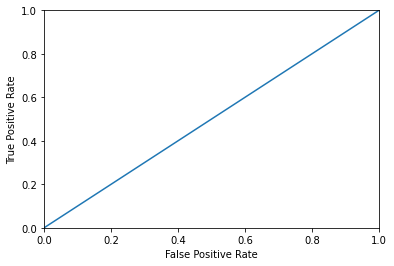

0.5
0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [0]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef

fpr , tpr , thresholds = roc_curve (test_labels,pred)
plot_roc_curve (fpr,tpr)
auc_score=roc_auc_score(test_labels,pred) 
print(auc_score) 
print(matthews_corrcoef(test_labels,pred))

In [0]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show() 